In [ ]:
# 1. Use las dos bases de datos que se encuentran en los siguientes links

# https://docs.google.com/spreadsheets/d/1lngWULM2frbJ3PCM2DrC3aFCCnmg7Ue2dE9q-LoQ89c/edit#gid=2045866651

# https://www.datos.gov.co/resource/ae7u-y7m2.json


# 1.Para ello realizar una limpieza de datos bajo los siguientes criterios:
# -1/5 Borrar las filas, en los casos donde los datos vacíos no sean superiores a 20 (DEBE REVISAR POR CADA COLUMNA)
# -2/5 Borrar columnas en los cuales exista más del 50% de datos vacíos
# -3/5 Rellenar espacios faltantes de acuerdo a su criterio (Si es categórica o numérica)
# -4/5 Realice un gráfico de correlación y mencione cual es el par de variables más relacionadas, siempre y cuando exista forma de calcularla.
# -5/5 La base de datos resultante deberá filtrarla bajo un criterio a su gusto, al final debe hacer un reset_index y dejarlos como estaban a principio.

# (Entregar en notebooks separados)


# 2. Entregue la base de datos diabetes.csv con las respectivas transformaciones:
# -1/5 Debe calcular la media y mediana de cada una de las columnas numéricas.
# -2/5 De las columnas categóricas decir cual es el valor que más se repite
# -3/5 Deberá borrar las columnas que tengan más del 80% de datos vacío
# -4/5 Rellene las columnas numéricas con la media si la desviación está por debajo de 20 y con la mediana si esta por encima de 20
# -5/5 Realice un gráfico de correlación y mencione cual es el par de variables más relacionadas


# NOTA: Adjuntar únicamente los códigos con los cuales modificó las bases de datos.

In [1]:
import pandas as pd
import numpy as np
import io
from google.colab import files
from tqdm import tqdm
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

In [126]:
# Importación de los datos 2/2
data1 = pd.read_json('https://www.datos.gov.co/resource/ae7u-y7m2.json')

In [127]:
data2 = data1

In [128]:
def p1d5(df):
  ## 1/5 Borrar las filas, en los casos donde los datos vacíos no sean superiores a 20 (DEBE REVISAR POR CADA COLUMNA)
  print('1/5 Borrar las filas, con datos vacíos \n')
  for i in range(0, len(df.columns)):
    if (pd.isnull(df[df.columns[i]]).values.ravel().sum() < 20 and pd.isnull(df[df.columns[i]]).values.ravel().sum() != 0 ):
      print(f"Si Aplica null < 20 -- {df.columns[i]} = {pd.isnull(df[df.columns[i]]).values.ravel().sum()} ")
      for j in range(0, len(df)):
        if(pd.isnull(df[df.columns[i]][j])):
          df = df.drop(j)
      df = df.reset_index
      
    else :
      print(f"No aplica null > 20 -- {df.columns[i]} = {pd.isnull(df[df.columns[i]]).values.ravel().sum()}")
     

In [129]:
p1d5(data2)

1/5 Borrar las filas, con datos vacíos 

No aplica null > 20 -- codigo_capitulo = 0
No aplica null > 20 -- capitulo = 0
No aplica null > 20 -- codigo_subcapitulo = 0
No aplica null > 20 -- subcapitulo = 0
No aplica null > 20 -- codigo_item = 0
No aplica null > 20 -- item = 0
No aplica null > 20 -- unidad = 0
No aplica null > 20 -- valor_mano_obra = 0
No aplica null > 20 -- total = 0


In [130]:
def p2d5(df):
  ## 2/5 Borrar columnas en las cuales exista más del 50% de datos vacíos
  print(f'2/5 Borrar las columnas, con una cantidad de datos vacíos superior al 50% de los datos ({len(df) * 0.5}) \n')
  for i in range(0, len(df.columns)):
    if (pd.isnull(df[df.columns[i]]).values.ravel().sum() >  len(df) * 0.5 ):
      print(f"Si Aplica null > {len(df) * 0.5}  -- {df.columns[i]} = {pd.isnull(df[df.columns[i]]).values.ravel().sum()} ")
      df = df.drop(df.columns[i], axis = 1)
      
    else :
      print(f"No aplica null < {len(df) * 0.5} -- {df.columns[i]} = {pd.isnull(df[df.columns[i]]).values.ravel().sum()}")
      

In [131]:
p2d5(data2)

2/5 Borrar las columnas, con una cantidad de datos vacíos superior al 50% de los datos (500.0) 

No aplica null < 500.0 -- codigo_capitulo = 0
No aplica null < 500.0 -- capitulo = 0
No aplica null < 500.0 -- codigo_subcapitulo = 0
No aplica null < 500.0 -- subcapitulo = 0
No aplica null < 500.0 -- codigo_item = 0
No aplica null < 500.0 -- item = 0
No aplica null < 500.0 -- unidad = 0
No aplica null < 500.0 -- valor_mano_obra = 0
No aplica null < 500.0 -- total = 0


In [132]:
def p3d5(df):
  # 3/5 Rellenar espacios faltantes de acuerdo a su criterio (Si es categórica o numérica)
  print('3/5 Rellenar espacios faltantes, citerio: \n - si la variable es categórica, se cambian los vacíos con la moda \n - si la variable es numérica, se cambian los vacíos con la media \n')

  rll = [df[df.columns[x]].mean() if is_numeric_dtype(df[df.columns[x]].dtype) else df[df.columns[x]].mode().values[0] for x in range(0, len(df.columns))]
  
  for i in range(0, len(df.columns)):
    df[df.columns[i]] = df[df.columns[i]].fillna(rll[i])

In [133]:
p3d5(data2)

3/5 Rellenar espacios faltantes, citerio: 
 - si la variable es categórica, se cambian los vacíos con la moda 
 - si la variable es numérica, se cambian los vacíos con la media 



In [134]:
def p41d5(df):
  #4/5 1/2 Realice un gráfico de correlación y mencione cual es el par de variables más relacionadas, siempre y cuando exista forma de calcularla.

  if len(df.corr().values) != 1:
    print("Gafico de correlación")
    col = [df.columns[x] for x in range(0, len(df.columns)) if is_numeric_dtype(df[df.columns[x]].dtype)] # Nombres de la columnas numéricas
    df = df[col] # Nueva Bd con solo las conlumnas numéricas
    plt.matshow(df.corr())
  else: 
    print("No es posible generar el gráfico, solo hay una columna numérica")

Gafico de correlación


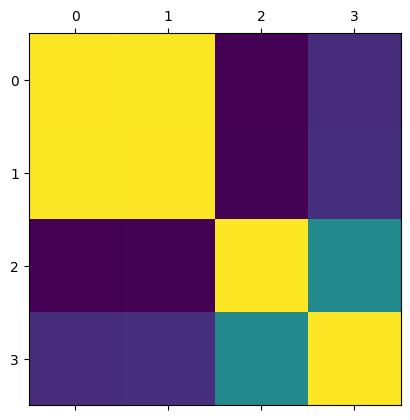

In [135]:
p41d5(data2)

In [136]:
def p42d5(df):
  # 4/5 2/2 Mencione cual es el par de variables más relacionadas, siempre y cuando exista forma de indicarlas

  if len(df.corr().values) != 1:
    col = [df.columns[x] for x in range(0, len(df.columns)) if is_numeric_dtype(df[df.columns[x]].dtype)] # Nombres de la columnas numéricas
    df = df[col] # Nueva Bd con solo las columnas numéricas
   
    #Verificación por medio de los valores
    print(f"A continuación se presenta un listado oredenado de menor a mayor con los valores de las correlaciones de las columnas\n")
    return df.corr().unstack().sort_values().drop_duplicates() 
  else: 
    print("No es posible relacionar dos variables, solo hay una columna numérica")
    

In [137]:
p42d5(data2)

A continuación se presenta un listado oredenado de menor a mayor con los valores de las correlaciones de las columnas



codigo_capitulo     valor_mano_obra       0.130124
codigo_subcapitulo  valor_mano_obra       0.135160
codigo_capitulo     total                 0.239888
codigo_subcapitulo  total                 0.249788
valor_mano_obra     total                 0.542077
codigo_capitulo     codigo_subcapitulo    0.995524
                    codigo_capitulo       1.000000
dtype: float64

In [120]:
data2 = data1

In [138]:
#5/5 La base de datos resultante deberá filtrarla bajo un criterio a su gusto, al final debe hacer un reset_index
# print("Criterio el género de la columna 'Contact: Gender' = 'Female'")

data = data2[data2['subcapitulo'] == 'ESTRUCTURAS']


In [139]:
data.head()

,codigo_capitulo,capitulo,codigo_subcapitulo,subcapitulo,codigo_item,item,unidad,valor_mano_obra,total
119,1,EDIFICACIONES,1.03,ESTRUCTURAS,1.03.01,"COLUMNAS EN CONCRETO 21 MPa - (3000 PSI), ALTU...",M3,252673.22,1184917.93
120,1,EDIFICACIONES,1.03,ESTRUCTURAS,1.03.02,"COLUMNAS EN CONCRETO 21 MPa (3000 PSI), ALTURA...",M3,313079.06,1238546.75
121,1,EDIFICACIONES,1.03,ESTRUCTURAS,1.03.03,CONSTRUCCION DE VIGA CANAL EN CONCRETO IMPERME...,M3,364227.24,1152855.06
122,1,EDIFICACIONES,1.03,ESTRUCTURAS,1.03.04,CONSTRUCCION DE VIGA CANAL EN CONCRETO IMPERME...,M3,364227.24,1174436.45
123,1,EDIFICACIONES,1.03,ESTRUCTURAS,1.03.05,CONSTRUCCION DE VIGA CANAL EN CONCRETO IMPERME...,M3,364227.24,1216130.00


In [140]:
data = data.reset_index